### フーリエ級数展開について

周期が$2L$である周期関数$f(x)$のフーリエ級数展開は以下のように表される。

$$
f(x) = \frac{a_0}{2} + \Sigma_{n=1}^{\infty} a_n cos(\frac{n \pi x}{L}) + \Sigma_{n=1}^{\infty} b_n sin(\frac{n \pi x}{L}) \\
a_n = \frac{1}{L} \int_{-L}^{L} f(x) cos(\frac{n \pi x}{L}) dx
b_n = \frac{1}{L} \int_{-L}^{L} f(x) sin(\frac{n \pi x}{L}) dx
$$

ただし、フーリエ級数展開が適応できる関数は、区分的になめらかな連続であることが求められる。
区分的になめらかな連続とは、一階微分が区分的に連続である(不連続であっても良いが、無限大へ発散しない)関数のことである。

In [1]:
%matplotlib inline

### 以下のコードに関して

以下のコードでは、周期 $8 (T)$ の矩形波 $f(x)$ を $n=1\sim 10(armonics)$ でフーリエ級数展開している。
$$
f(x) = \left\{ \begin{array}{ll}
    1 & (2m \leq x \leq 2m + 1) \\
    -1 & (2m - 1 \leq x \leq 2m)
\end{array} \right. \\
m \in \mathbb{Z}
$$

```
T = 8 # 周期
armonics = 10 # n
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Setup
x_ = np.linspace(-20,20,10000)

T = 8
armonics = 10

def squareWave(x):
    global T
    lowerBoundLeft = (-T/2)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    one = 1
    negativeOne = -1

    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return one
        else:
            lowerBoundLeft -= T/2
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if one == 1:
                one = -1
                negativeOne = 1
            else:
                one = 1
                negativeOne = -1
                
# Bn coefficients
def bn(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0

# Wn
def wn(n):
    global T
    wn = (2*np.pi*n)/T
    return wn

# Fourier Series function
def fourierSeries(n_max,x):
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
        try:
            partialSums = partialSums + bn(n)*np.sin(wn(n)*x)
        except:
            print("pass")
            pass
    return partialSums


y = []
f = []
for i in x_:
    y.append(squareWave(i))
    f.append(fourierSeries(armonics,i))


plt.plot(x_,y,color="blue",label="Signal")
plt.plot(x_,f,color="red",label="Fourier series approximation")
plt.title("Fourier Series approximation number of armonics: "+str(armonics))
plt.legend()
plt.show()

この$f(x)$は奇関数であることから、
$$
a_n = 0
$$
となる。また、$b_n$についても、上記式に当てはめると、
$$
b_n = \left\{ \begin{array}{ll}
    0 & (n = 2m) \\
    -1 & (n = 2m + 1)
\end{array} \right. \\
n, m \in \mathbb{Z}
$$
となる。
したがって、$f(x)$のフーリエ級数展開は、
$$
f(x) = \Sigma_{m=1}^{\infty} \frac{4}{(2m-1) \pi} sin(\frac{(2m-1) \pi}{4} x)
$$
となる。

以降、数式上の関数は関数とし、コード上の関数はコード関数とする。

In [3]:
# Bn coefficients
def bn(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0

この部分で$f(x)$のフーリエ級数展開の係数$b_n$をコード関数で定義し、

In [4]:
# Wn
def wn(n):
    global T
    wn = (2*np.pi*n)/T
    return wn

この部分では係数$b_n$の時の角周波数をコード関数で定義している。

In [6]:
# Fourier Series function
def fourierSeries(n_max,x):
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
        try:
            partialSums = partialSums + bn(n)*np.sin(wn(n)*x)
        except:
            print("pass")
            pass
    return partialSums

上記２つのコード関数を利用して、$f(x)$を$n=1\sim 10$の範囲でフーリエ級数展開するコード関数であり、
以下で$f(x)$と共に、
$$
y \quad (=\quad f(x)) \\
f \quad (=\quad \Sigma_{m=1}^{5} \frac{4}{(2m-1) \pi} sin(\frac{(2m-1) \pi}{4} x))
$$
に代入している。

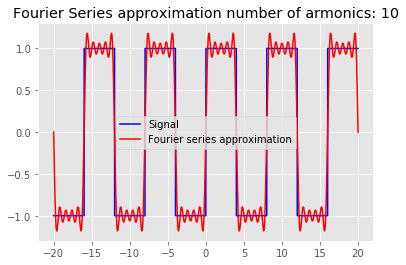

In [7]:
y = []
f = []
for i in x_:
    y.append(squareWave(i))
    f.append(fourierSeries(armonics,i))


plt.plot(x_,y,color="blue",label="Signal")
plt.plot(x_,f,color="red",label="Fourier series approximation")
plt.title("Fourier Series approximation number of armonics: "+str(armonics))
plt.legend()
plt.show()